# Climatology of the Democratic Republic of Congo

## Yves HERI

___

## Abstract


<div style="text-align: justify">An understanding of variability and trends in precipitation and temperature is important for the prediction of possible hazard. In this report, we present the study of the mean climatology, the seasonal mean climatology and the annual anomalies for precipitation and temperature over the Democratic Republic of Congo. This study reveal that the Northern part of DRC is a wet and hot region while the South is more cool and dry.

## Methodology and data

<div style="text-align: justify">We use the cpc_Africa_1985_2004.nc and chirps-v2.0.1985-2004.monthlyp_25.nc data
containing respectively the observed temperatures and precipitation given on a range of 20
years following a monthly frequency. From these data, we are extracting the information for
DRC and using a python script we compute the different climatologies. The operator cdo
selseas allows the extraction of the data corresponding to each season. The seasonal data is
used for the analysis of the mean seasonal climatology. For the study of the annual anomaly,
we consider Kinshasa, Lubumbashi, Goma and Mbandaka

___

#### Import Libraries

In [9]:
#!/bin/env python 

import scipy.stats
import numpy as np ; import numpy.ma as ma
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from netCDF4 import Dataset
import netCDF4
import time
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import sys, glob, os, re
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

In [10]:
path = os.getcwd() #Working directory

In [11]:
path

'C:\\Users\\Client\\OneDrive\\Documents\\Coding\\Codes Repository\\GitHub Repositories\\PROJECT'

#### Function allowing to save high-quality figures in different formats

In [12]:

def save(path, ext='png', close=True, verbose=True):

    
    """
    Save a figure from pyplot.
    Parameters
    ----------
    path : string
    The path (and filename, without the extension) to save the
    figure to.
    ext : string (default='png')
    The file extension. This must be supported by the active
    matplotlib backend (see matplotlib.backends module).  Most
    backends support 'png', 'pdf', 'ps', 'eps', and 'svg'.
    close : boolean (default=True)
    Whether to close the figure after saving.  If you want to save
    the figure multiple times (e.g., to multiple formats), you
    should NOT close it in between saves or you will have to
    re-plot it.
    verbose : boolean (default=True)
    whether to print information about when and where the image
    has been saved.
    
    """
    # Extract the directory and filename from the given path
    
    directory = os.path.split(path)[0]
    filename = "%s.%s" % (os.path.split(path)[1], ext)
    if directory == '':
        directory = '.'
    
    #If the directory does not exist, create it
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # The final path to save to
    
    savepath = os.path.join(directory, filename)
    if verbose:
        print("Saving figure to '%s'..." % savepath),
    
    # Actually save the figure
    
    plt.savefig(savepath)
    
    # Close it
    
    if close:
        plt.close()
    if verbose:
        print("Done")


## Results and Discussions

___

## 1. Temperature Climatologies

The following is the code for mean climatologies for temperature.

### Temperature mean

C:\Users\Client\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


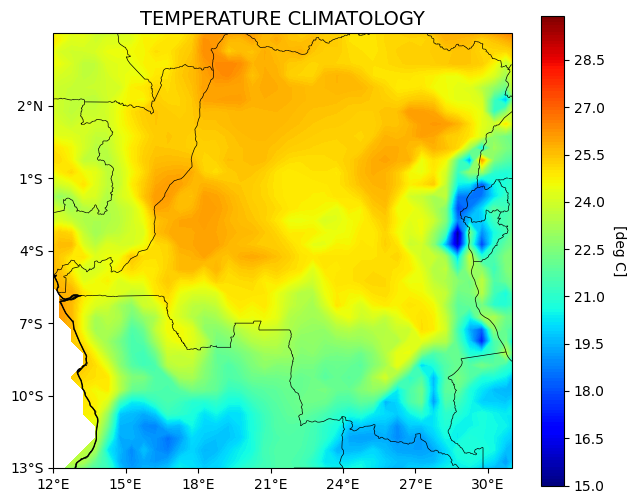

In [13]:

##########################################################################################

#--------Here let's read the different netDF files corresponding to four seasons--------- 

#--------climatology--------- 

ncfile0 = Dataset(path+'\\Temperature\\cpc_Africa_1985_2004.nc', 'r', format='NETCDF4')
temp_all = np.array(ncfile0.variables['tmean'][:,:,:]) 
lat = np.array(ncfile0.variables['lat'][:])
lon = np.array(ncfile0.variables['lon'][:])
time = ncfile0.variables['time']
ncfile0.close()

############################## compute mean ####################################

temp_all = np.mean(temp_all,axis=0)  

#=========================Map resources==============================

fig = plt.figure(figsize=(7.40,6.10))
kwargs = {'format': '%.0f'}  # to fix decimals at X numbers after - put **kwargs in plt.cbar 
[lon2d, lat2d] = np.meshgrid(lon, lat)

prj = ccrs.PlateCarree(central_longitude=0.0)

axa = plt.subplot(111, projection=prj)
axa.add_feature(cfeat.COASTLINE ,edgecolor = 'k')
axa.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
axa.coastlines(resolution='10m',linewidth=0.5);

cs1 = plt.contourf(lon2d,lat2d,temp_all,levels = np.arange(15., 30,0.1),cmap=plt.cm.jet)

axa.set_extent([12 ,31, -13, 5])
axa.set_xticks(range(12,31,3), crs=prj)
axa.set_yticks(range(-13,5,3), crs=prj)
axa.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axa.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.title('TEMPERATURE CLIMATOLOGY', fontsize=14)
plt.ylabel('')
cb0 = plt.colorbar ( cs1, ax = axa,orientation ='vertical' )

cb0.set_label('[deg C]',rotation=270,labelpad=15) 

plt.show()
# filout = "temperature.png"
# fig.savefig(filout,dpi=300) ; plt.close()


# save(path+'\\Temperature\\figures\\temp_time_mean', ext='pdf', close=True, verbose=True)  # save high quality figures

### Temperature all seasons

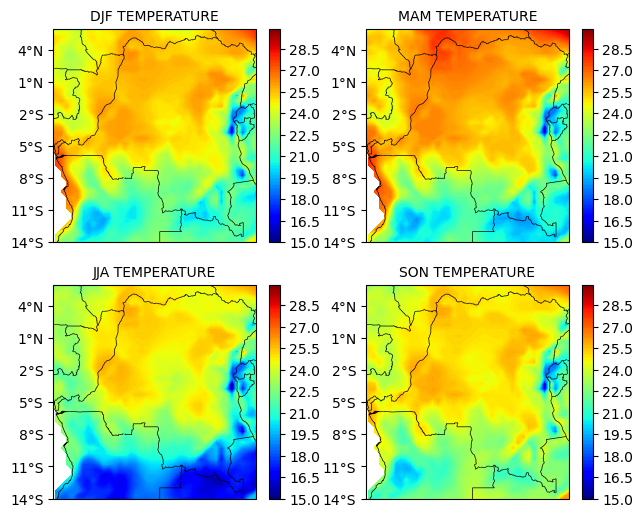

In [14]:
#### Here let's read the different netDF files corresponding to four seasons and Compute mean for all seasons

list_seasons = ["DJF","MAM","JJA","SON"]

ncfile_all = []

ncfile_temp = []

for i in range(len(list_seasons)):
    ncfile_all_i = Dataset(path+f'\\Temperature\\{list_seasons[i]}.nc', 'r', format='NETCDF4')
    ncfile_all.append(ncfile_all_i)
    ncfile_temp_i = np.mean(ncfile_all_i.variables['tmean'][:,:,:],axis=0)
    ncfile_temp.append(ncfile_temp_i)    
    ncfile_all_i.close()

#========================= Cartopy ==============================

fig = plt.figure(figsize=(7.40,6.10))
kwargs = {'format': '%.0f'}  # to fix decimals at X numbers after - put **kwargs in plt.cbar 
[lon2d, lat2d] = np.meshgrid(lon, lat)
prj = ccrs.PlateCarree(central_longitude=0.0)


for i in range(len(list_seasons)):
    
    axa = plt.subplot(int(f'22{i+1}'), projection=prj)
    
    axa.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
    axa.coastlines(resolution='10m',linewidth=0.5);
    
    cs1 = plt.contourf(lon2d,lat2d,ncfile_temp[i],levels = np.arange(15., 30,0.1),cmap=plt.cm.jet)
    axa.set_extent([12 ,31, -14, 6])

    axa.set_yticks(range(-14,6,3), crs=prj)

    axa.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    plt.title(f'{list_seasons[i]} TEMPERATURE', fontsize=10)
    plt.ylabel('')

    cb0 = plt.colorbar ( cs1, ax = axa,orientation ='vertical' )

# plt.show()
# filout = "temperature_all.png"
# fig.savefig(filout,dpi=300) ; plt.close()

# save(path+'\\Temperature\\figures\\temp_time_season', ext='pdf', close=True, verbose=True)  # save high quality figures


## 2. Rainfall (precipitation) climatologie

### Rainfall mean

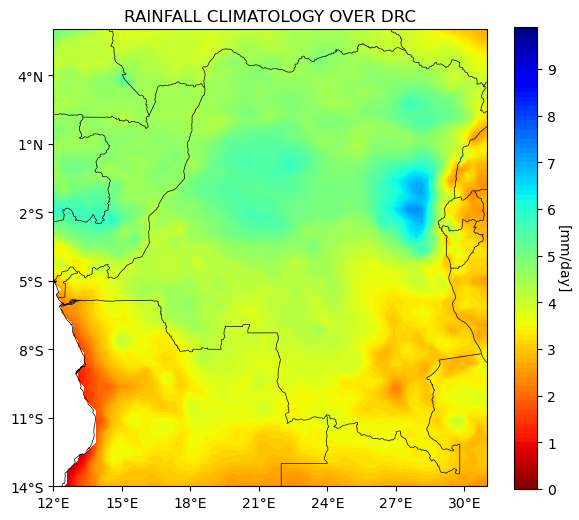

In [15]:
##########################################################################################

#--------Here let's read the different netDF files corresponding to four seasons--------- 

ncfile0 = Dataset(path+'\\Precipitation\\chirps-v2.0.1985-2004.monthly_p25.nc', 'r', format='NETCDF4')
pre = ncfile0.variables['precip'][:,:,:] # MULTIPLY BY 86400 TO CONVERT TO MM/DAY
lat = ncfile0.variables['latitude'][:]
lon = ncfile0.variables['longitude'][:]
time = ncfile0.variables['time']
ncfile0.close()

##############################compute mean ####################################

pre = np.mean(pre,axis=0)  
pre

#-------mask precipitation below 1 mm/day

pre = ma.masked_where(pre <= 0.3, pre)

#=========================Map resources==============================

fig = plt.figure(figsize=(7,6))
kwargs = {'format': '%.0f'}  # to fix decimals at X numbers after - put **kwargs in plt.cbar 
[lon2d, lat2d] = np.meshgrid(lon, lat)


prj = ccrs.PlateCarree(central_longitude=0.0)

axa = plt.subplot(111, projection=prj)
axa.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
axa.coastlines(resolution='10m',linewidth=0.5);

cs1 = plt.contourf(lon2d,lat2d,pre,levels = np.arange(0, 10,0.1),cmap=plt.cm.jet_r)

axa.set_extent([12 ,31, -14, 6])
axa.set_xticks(range(12,31,3), crs=prj)
axa.set_yticks(range(-14,6,3), crs=prj)
axa.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axa.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.title('RAINFALL CLIMATOLOGY OVER DRC', fontsize=12)
plt.ylabel('')
cb0 = plt.colorbar ( cs1, ax = axa,orientation ='vertical' )

cb0.set_label('[mm/day]',rotation=270,labelpad=10) 

plt.show()
# filout = "temperature.png"
# fig.savefig(filout,dpi=300) ; plt.close()


# save('figures/Rainfall_time_mean', ext='pdf', close=True, verbose=True)  # save high quality figures


### Rainfall all seasons

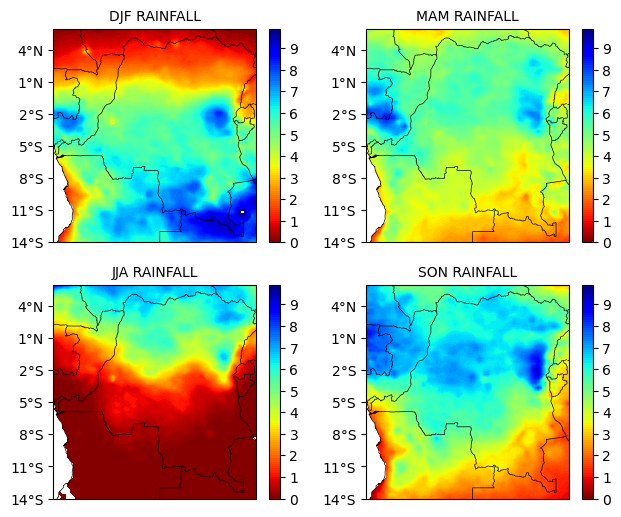

In [16]:
#--------Here let's read the different netDF files corresponding to four seasons--------- 

list_seasons = ["DJF","MAM","JJA","SON"]

ncfile_all = []

ncfile_pre = []

for i in range(len(list_seasons)):
    ncfile_all_i = Dataset(path+f'\\Precipitation\\{list_seasons[i]}.nc', 'r', format='NETCDF4')
    ncfile_all.append(ncfile_all_i)
    ncfile_pre_i = np.mean(ncfile_all_i.variables['precip'][:,:,:],axis=0)
    ncfile_pre_i = ma.masked_where(ncfile_pre_i <= 0, ncfile_pre_i)
    ncfile_pre.append(ncfile_pre_i)    
    ncfile_all_i.close()

    
    
#========================= Cartopy ==============================

fig = plt.figure(figsize=(7.40,6.10))
kwargs = {'format': '%.0f'}  # to fix decimals at X numbers after - put **kwargs in plt.cbar 
[lon2d, lat2d] = np.meshgrid(lon, lat)
prj = ccrs.PlateCarree(central_longitude=0.0)


for i in range(len(list_seasons)):
    
    axa = plt.subplot(int(f'22{i+1}'), projection=prj)
    
    axa.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
    axa.coastlines(resolution='10m',linewidth=0.5);
    
    cs1 = plt.contourf(lon2d,lat2d,ncfile_pre[i],levels = np.arange(0, 10,0.1),cmap=plt.cm.jet_r)
    axa.set_extent([12 ,31, -14, 6])

    axa.set_yticks(range(-14,6,3), crs=prj)

    axa.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    plt.title(f'{list_seasons[i]} RAINFALL', fontsize=10)
    plt.ylabel('')

    cb0 = plt.colorbar ( cs1, ax = axa,orientation ='vertical' )

# plt.show()
# filout = "temperature_all.png"
# fig.savefig(filout,dpi=300) ; plt.close()

# save(path+'\\Precipitation\\figures\\Rainfall_all_seasons', ext='pdf', close=True, verbose=True)  # save high quality figures
    



## 3. Precipitation anomalies in Goma, Lubumbashi, Kinshasa and Mbandaka

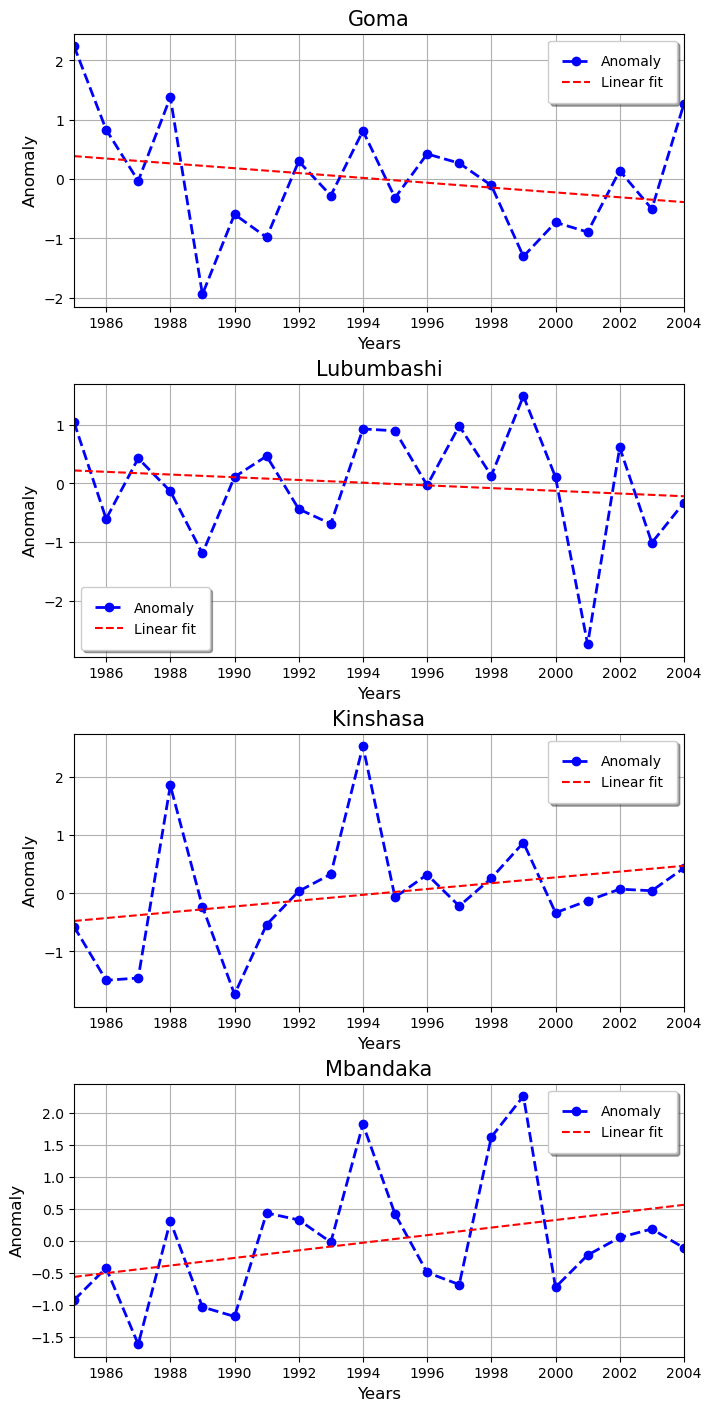

In [20]:
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from matplotlib.ticker import MaxNLocator

list_stations = {'Goma': [29.22,1.6585],   # Name : [Lat,Lon]
                 
                 'Lubumbashi': [27.5,11.68],
                 
                 'Kinshasa': [15.266,-4.4419],
                 
                 'Mbandaka': [18.297,0.0266] }


years=range(1985,2005) # From the Data description

Len_list = len(list_stations)

dsG = []

dslocG = []

fig, axs = plt.subplots(Len_list ,layout="constrained",figsize=(7,14))


for i in range(Len_list):
    key_list  = list(list_stations.keys())
    
    
    dsG_temp = xr.open_dataset(path+f'\\Extraction\\chirps_yearmean_std_remapbil_{key_list[i]}.nc')  # NetCDF or OPeNDAP URL
    dsG.append(dsG_temp)

    # Extract a dataset closest to specified point
    
    values_list = list(list_stations.values())
    
    Lat_i = values_list[i][0]
    Lon_i = values_list[i][1]
    dslocG.append(dsG[i].sel(lon=Lon_i, lat=Lat_i, method='nearest'))

    # Select a variable to plot

    axs[i].plot(years, dslocG[i]['precip'], marker = 'o', color = 'blue',label='Anomaly',linestyle='dashed',linewidth=2)
    slopeG, interceptG = np.polyfit(years, dslocG[i]['precip'], 1)
    axs[i].set_xlabel('Years', fontsize=12)
    axs[i].set_ylabel('Anomaly', fontsize=12)

    axs[i].set_title(f'{key_list[i]}',fontsize=15)

    axs[i].set_xlim(years[0],years[-1])
    axs[i].tick_params(axis='x', rotation=0)

    slope, intercept = np.polyfit(years, dslocG[i]['precip'], 1)
    trend = intercept + (slope * years)
      
    axs[i].plot(years, trend, color='red', label='Linear fit', linestyle='--')
    axs[i].legend(loc='lower left')

    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
    axs[i].legend(fancybox=True, framealpha=1, shadow=True ,borderpad=1, ncol=1)
    axs[i].grid()

# plt.show()

___